In [1]:
import pandas as pd 
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='reynolddoss', api_key='NVejYWMt1A1Fe3FKAsud')
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
trainID = train['Id']
testID = test['Id']

In [7]:
#Dropping id from both
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [8]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
#look for outliers in sales price vs GrLivArea
trace = go.Scatter(x=train['GrLivArea'],y=train['SalePrice'],mode='markers')
data = [trace]
py.iplot(data, filename='outlier-scatter')

In [10]:
#Drop outliers GrLivArea >4000
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [11]:
#deleted outliers 
trace = go.Scatter(x=train['GrLivArea'],y=train['SalePrice'],mode='markers')
data = [trace]
py.iplot(data,filename='Deleted outliers')

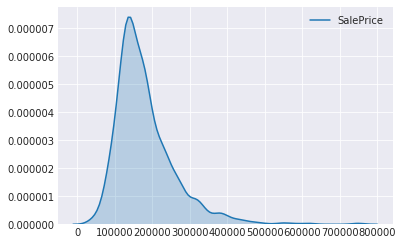

In [12]:
sns.kdeplot(train['SalePrice'],shade=True)

In [13]:
#A highly skewed independent variable may be made more symmetric with a transformation.
#using log(1+x) function on all elements to make normalized distribution 
train['SalePrice'] = np.log1p(train['SalePrice'])

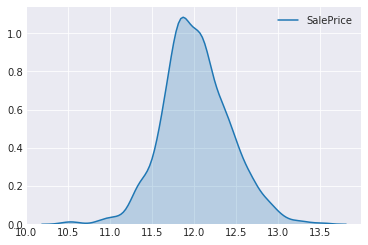

In [14]:
sns.kdeplot(train['SalePrice'],shade=True)

In [15]:
#store the saleprice in a varibale for training
saleprice = np.array(train['SalePrice'])

In [16]:
full_data = pd.concat((train,test),ignore_index=True)

In [17]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [18]:
full_data.drop(['SalePrice'],inplace=True,axis=1)

In [19]:
#dealing with missing data
full_data_na = (full_data.isnull().sum()/len(full_data)*100) 

In [20]:
#Drop columns with zero errors
full_data_na = full_data_na.drop(full_data_na[full_data_na==0].index).sort_values(ascending=False)

In [21]:
Missing_data = pd.DataFrame({"MissingRatio":full_data_na})

In [22]:
#display error bars

data = [go.Bar(
            x=Missing_data.values,
            y=Missing_data.index[:30],
            orientation = 'h'
)]

py.iplot(data, filename='Missing_horizontal-bar')

In [23]:
#Dealing with missing values w.r.t to the data description in the data description file
#PoolQC NA is no pool hence data with none is valid
full_data['PoolQC'] = full_data['PoolQC'].fillna("None")

In [24]:
#Misc Feature NA is none and hence valid 
full_data['MiscFeature'] = full_data['MiscFeature'].fillna("None")

In [25]:
#Alley NA is no access to alley hence None is valid
full_data['Alley'] = full_data['Alley'].fillna('None')

In [26]:
#Fence NA is no fence and hence None is valid
full_data['Fence'] = full_data['Fence'].fillna("None")

In [27]:
#FireplaceQu NA is no fire place and hence None is valid
full_data['FireplaceQu'] = full_data['FireplaceQu'].fillna("None")

In [28]:
full_data['LotFrontage'] = full_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [29]:
# since NA means No Garage
full_data['GarageQual'] = full_data['GarageQual'].fillna("None")

In [30]:
#Garage condition NA means 
full_data["GarageCond"] = full_data['GarageCond'].fillna("None")

In [31]:
#Garage Fininsh NA means no garage 
full_data['GarageFinish'] = full_data['GarageFinish'].fillna("None")

In [32]:
#Garage Type NA means no garage
full_data['GarageType'] = full_data['GarageType'].fillna("None")

In [33]:
# Basement na means 0
full_data['BsmtFinSF1'] = full_data['BsmtFinSF1'].fillna(0)
full_data['BsmtFinSF2'] = full_data['BsmtFinSF2'].fillna(0)
full_data['BsmtUnfSF'] = full_data['BsmtUnfSF'].fillna(0)
full_data['TotalBsmtSF'] = full_data['TotalBsmtSF'].fillna(0)
full_data['BsmtFullBath'] = full_data['BsmtFullBath'].fillna(0)
full_data['BsmtHalfBath'] = full_data['BsmtHalfBath'].fillna(0)



In [34]:
# Basement na means no basement
full_data['BsmtFinType1'] = full_data['BsmtFinType1'].fillna("None")
full_data['BsmtFinType2'] = full_data['BsmtFinType2'].fillna("None")
full_data['BsmtCond'] = full_data['BsmtCond'].fillna("None")
full_data['BsmtExposure'] = full_data['BsmtExposure'].fillna("None")


In [35]:
#Masonry veneer area na is 0 & type na is None
full_data['MasVnrArea'] = full_data['MasVnrArea'].fillna(0)
full_data['MasVnrType'] = full_data['MasVnrType'].fillna("None")

In [36]:
full_data['MSZoning'] = full_data['MSZoning'].fillna(full_data['MSZoning'].mode()[0])

In [37]:
# Utilities have all values as Allpub with 2 na which cant be usefull in predictive modelling so removing it wont make any difference 
full_data = full_data.drop(['Utilities'],axis=1)

In [38]:
# WRT to data description na implies Typical
full_data['Functional'] = full_data['Functional'].fillna("Typ")

In [39]:
# most frequent value
full_data['Electrical'] = full_data['Electrical'].fillna(full_data['Electrical'].mode()[0])

In [40]:
full_data['KitchenQual'] = full_data['KitchenQual'].fillna(full_data['KitchenQual'].mode()[0])

In [41]:
#Exterior 1 and 2 with mode 
full_data['Exterior1st'] = full_data['Exterior1st'].fillna(full_data['Exterior1st'].mode()[0])
full_data['Exterior2nd'] = full_data['Exterior2nd'].fillna(full_data['Exterior2nd'].mode()[0])

In [42]:
#SaleType 
full_data['SaleType'] = full_data['SaleType'].fillna(full_data['SaleType'].mode()[0])

In [43]:
# Garage Yr blt Na is 0 and area na is also 0
full_data['GarageYrBlt'] = full_data['GarageYrBlt'].fillna(0)
full_data['GarageArea'] = full_data['GarageArea'].fillna(0)
full_data['GarageCars'] = full_data['GarageCars'].fillna(0)

In [44]:
# Bsmt quality NA means None 
full_data['BsmtQual'] = full_data['BsmtQual'].fillna("None")

In [45]:
# Missing values check 
((full_data.isnull().sum()/len(full_data))*100).sort_values(ascending=False)[:4]

YrSold        0.0
Foundation    0.0
ExterCond     0.0
ExterQual     0.0
dtype: float64

In [46]:
# converting Numerical categorical value into categorical features (strings)
full_data['MSSubClass'] = full_data['MSSubClass'].apply(str)
full_data['OverallCond'] = full_data['OverallCond'].astype(str)
full_data['YrSold'] = full_data['YrSold'].astype(str)
full_data['MoSold'] = full_data['MoSold'].astype(str)

In [47]:
# Label Encoding on all the categorical features
from sklearn.preprocessing import LabelEncoder

In [48]:
# columns that have ordinal categorical variable that need encoding 
col = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [49]:
for x in col :
    Label = LabelEncoder()
    Label.fit(list(full_data[x].values))
    full_data[x] = Label.transform(list(full_data[x].values))

In [50]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,Normal,WD,0,1,8,856.0,0,2003,2003,2
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,Normal,WD,0,1,6,1262.0,298,1976,1976,1
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,Normal,WD,0,1,6,920.0,0,2001,2002,2
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,Abnorml,WD,0,1,7,756.0,0,1915,1970,0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,Normal,WD,0,1,9,1145.0,192,2000,2000,2


In [51]:
# Creating a new feature .. Total area 
full_data['TotalSF'] = full_data['TotalBsmtSF']+full_data['1stFlrSF']+full_data['2ndFlrSF']

In [52]:
# Removing skewness in the features 
num_features = full_data.dtypes[full_data.dtypes != "object"].index

In [53]:
# checking for the skewness of these features
skewness = full_data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

In [54]:
skewed = pd.DataFrame({'Skewness':skewness})

In [55]:
skewed.head()

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [56]:
skewed = skewed[abs(skewed)>0.75]

In [57]:
skewed.shape

(59, 1)

In [58]:
skew_col = skewed.index
lam = 0.15
for col in skew_col:
    full_data[col] = boxcox1p(full_data[col],lam)   

In [59]:
full_data = pd.get_dummies(full_data)

In [60]:
full_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1


In [61]:
saleprice.shape

(1458,)

In [62]:
n_train = 1458

In [63]:
train = full_data[:n_train]
y_train = saleprice
test = full_data[n_train:]

In [91]:

# Model Training 
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone

In [65]:
# use of cross validation for all the regression models 
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds,shuffle=True,random_state=40).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,train.values,y_train,scoring='neg_mean_squared_error',cv=kf))
    return rmse

In [66]:
## LASSO Regression

In [67]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0004,random_state=5))

In [68]:
score = rmsle_cv(lasso)

In [69]:
score.mean(),score.std()

(0.11161103311769413, 0.0074597277809506559)

In [70]:
## Elastic net regression

In [71]:
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=5))

In [72]:
score = rmsle_cv(ENet)

In [73]:
score.mean(),score.std()

(0.11156216575762468, 0.0074035058408257358)

In [74]:
## Kernel Ridge Regression

In [75]:
KRR = KernelRidge(alpha=0.5,degree=2,kernel='polynomial',coef0=2.5)

In [76]:
score = rmsle_cv(KRR)

In [77]:
score.mean(),score.std()

(0.11558929728120135, 0.0077703147160239983)

In [78]:
## Gradient Boosting Regression with huber loss function

In [79]:
GBR = GradientBoostingRegressor(loss='huber',n_estimators=1000,min_samples_split=5,
                                max_depth=5,min_samples_leaf=3,max_features='sqrt',
                               random_state=5,learning_rate = 0.05)

In [80]:
score = rmsle_cv(GBR)

In [81]:
score.mean(),score.std()

(0.1135614378542505, 0.0079289657895967088)

In [82]:
## XGBoost  with huber loss function

In [83]:
XGB = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.048,gamma=0.05,colsample_bytree=0.5,nthread=-1.5,
                       subsample=0.45,random_state=5)

In [84]:
score = rmsle_cv(XGB)

In [85]:
score.mean(),score.std()

(0.11650956372705154, 0.0082938920837602233)

In [86]:
## Light Gradient Boosting 

In [87]:
LGB = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [88]:
score = rmsle_cv(LGB)

In [89]:
score.mean(),score.std()

(0.11618749898635419, 0.0070732121253511502)

In [96]:
class ModelAvg(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    def fit(self,X,y):
        self.modelz = [clone(x) for x in self.models]
        
        for model in self.modelz:
            model.fit(X,y)
            return self
        
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.modelz])
        return np.mean(predictions,axis=1)

In [97]:
avg_model = ModelAvg(models=(ENet,GBR,KRR,lasso))

In [ ]:
score = rmsle_cv(avg_models)